### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [5]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


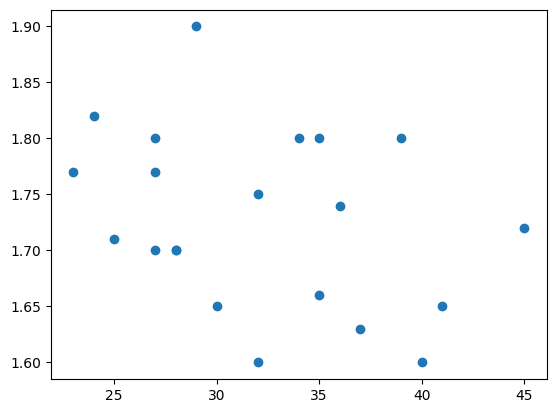

In [6]:
import matplotlib.pyplot as plt


plt.scatter(df['Edad'], df['Altura'])

<Axes: xlabel='Edad', ylabel='Altura'>

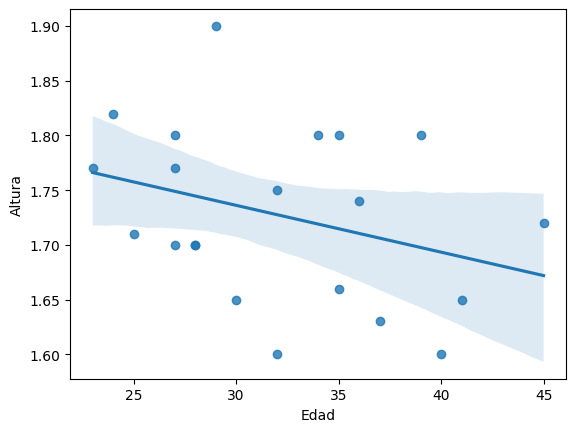

In [7]:
import seaborn as sns

sns.regplot(data=df, x="Edad", y="Altura")

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_12940\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

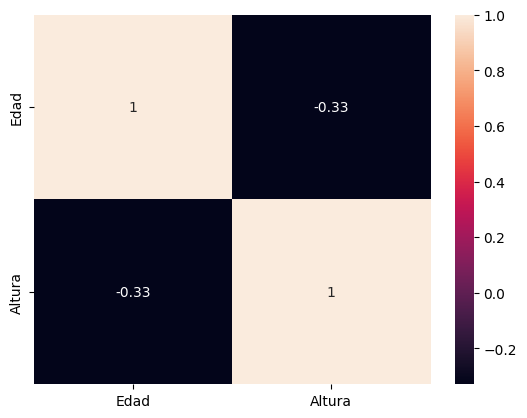

In [8]:
sns.heatmap(df.corr(), annot=True)

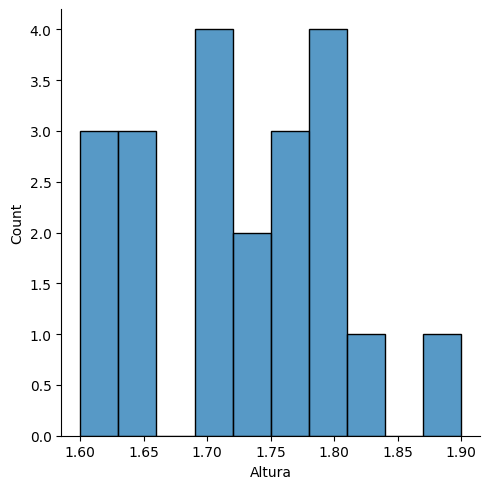

In [11]:
sns.displot(df['Altura'], bins=10)

### Entrena un modelo de regresión lineal

In [12]:
X = df[['Edad']]
y = df['Altura']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(21, 1)
(15, 1)
(6, 1)


In [15]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(21,)
(15,)
(6,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = model_1.predict(X_test)
predictions

array([1.7764719 , 1.76028923, 1.72792389, 1.74815222, 1.74006089,
       1.76028923])

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE. ¿Alguno es mejor para este problema?

In [20]:
model_1.intercept_

1.8695222482435596

In [21]:
model_1.coef_

array([-0.00404567])

y = a*x + b

Altura = -0.004 * Edad + 1.87

In [25]:
df_eval = pd.DataFrame(X_test)
df_eval['predictions'] = predictions
df_eval['real_value'] = y_test
df_eval['error'] = abs(df_eval['predictions'] - df_eval['real_value'])
df_eval

,Edad,predictions,real_value,error
14,23,1.776472,1.77,0.006472
5,27,1.760289,1.80,0.039711
2,35,1.727924,1.66,0.067924
11,30,1.748152,1.65,0.098152
7,32,1.740061,1.60,0.140061
18,27,1.760289,1.77,0.009711


In [26]:
df_eval['error'].mean()

0.06033840749414521

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions, y_test)

0.06033840749414521

In [30]:
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval

,Edad,predictions,real_value,error,error_cuad
14,23,1.776472,1.77,0.006472,0.000042
5,27,1.760289,1.80,0.039711,0.001577
2,35,1.727924,1.66,0.067924,0.004614
11,30,1.748152,1.65,0.098152,0.009634
7,32,1.740061,1.60,0.140061,0.019617
18,27,1.760289,1.77,0.009711,0.000094


In [32]:
df_eval['error_cuad'].mean()

0.00592961611153464

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions, y_test)

0.00592961611153464

In [34]:
np.sqrt(df_eval['error_cuad'].mean())

0.07700400062032257

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, predictions)

0.03652442489947345

In [36]:
model_1.score(X_train, y_train)

0.10544493837088842

In [37]:
model_1.predict(X_train)

array([1.71983255, 1.75624356, 1.75624356, 1.70769555, 1.73196956,
       1.72792389, 1.72387822, 1.70364988, 1.76838056, 1.71174122,
       1.76028923, 1.77242623, 1.74006089, 1.75219789, 1.68746721])

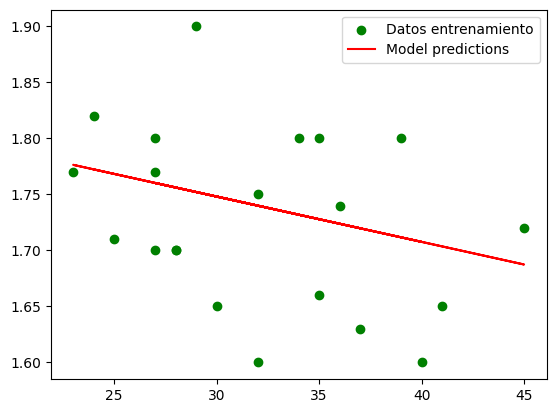

In [38]:
plt.scatter(df['Edad'], df['Altura'], color="g", label="Datos entrenamiento")
plt.plot(df['Edad'], model_1.predict(X), color="r", label="Model predictions")
plt.legend();

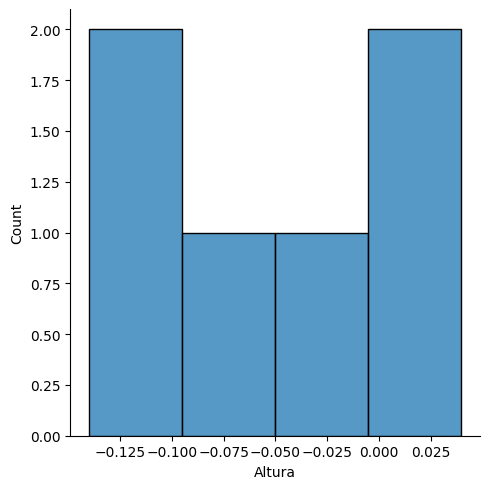

In [39]:
sns.displot(y_test-predictions)

In [41]:
model_1.predict([[80]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.54586885])